In [1]:
from photometry_tools import Image, Atlas
from astropy.io import fits
from astropy.coordinates import SkyCoord
%load_ext autoreload
%autoreload 2

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
# read the Image.
hdul = fits.open('/Users/luoyilin/Astro/NGC1068/NGC1068_images/NGC1068_2MASS_Ks.fits')
data = hdul[0].data
header = hdul[0].header
direct_coord = SkyCoord('02h42m40.7091669408s -00d00m47.859690204s')
ra, dec = direct_coord.ra, direct_coord.dec
img = Image(data=data, header=header,target_coordinate=(ra.value, dec.value))

In [3]:
# roughly estimate the background properties.
img.background_properties(mask_type='quick')

(0.009077470712700363, 0.009077584540211823, 6.711782357265186e-06)

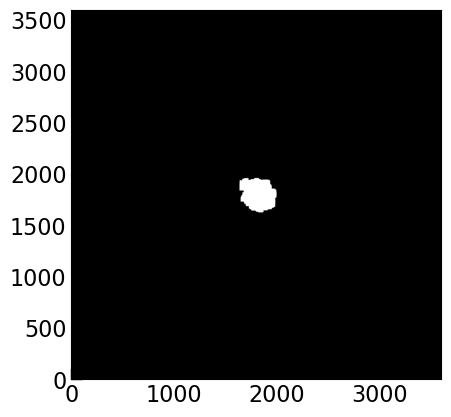

In [4]:
# build up the target galaxy mask.
img.mask_galaxy(plot=True)

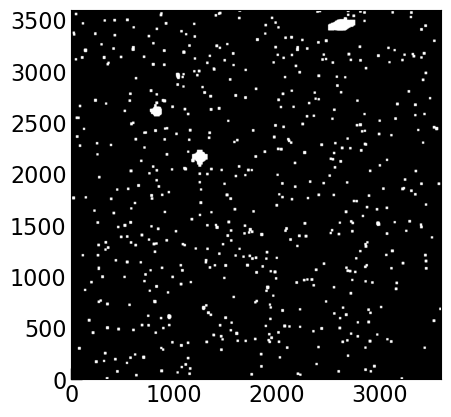

In [5]:
# build up the stars mask.
img.mask_stars(plot=True)

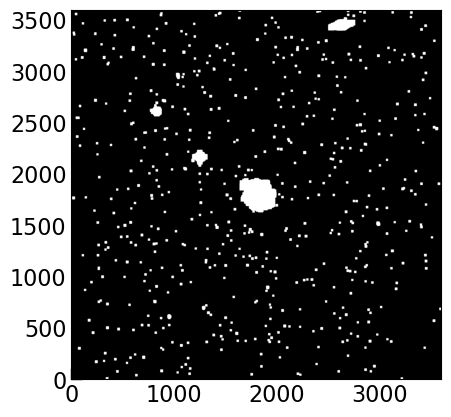

In [6]:
# build up the mask for estimating the backgroud.
img.mask_background(plot=True)

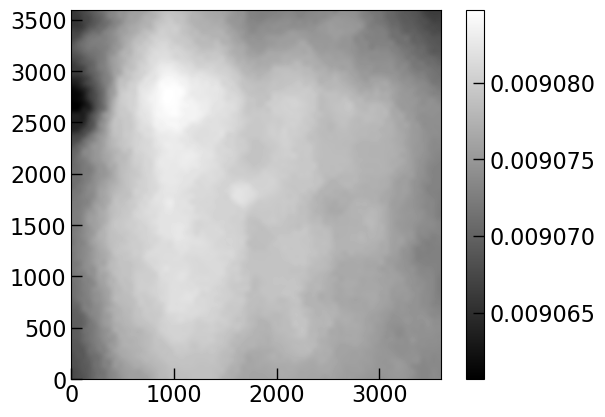

In [7]:
# get the background model.
img.background_model(plot=True)

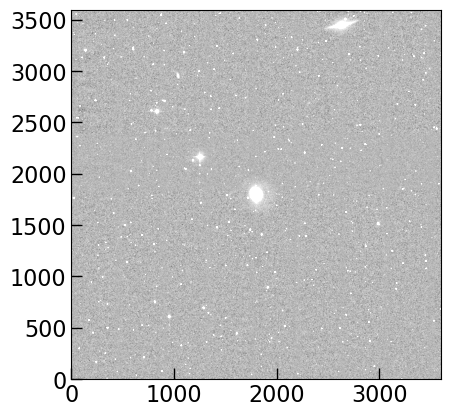

In [9]:
# background subtraction.
img.background_subtract(plot=True, percent=99.)

Ra,Dec,Gmag
float64,float64,float64
40.63622023602591,-0.006519415986380578,15.800105
40.6670225386869,-0.01564607668499174,18.640757
40.69163653686932,-0.023200052574029257,10.686306


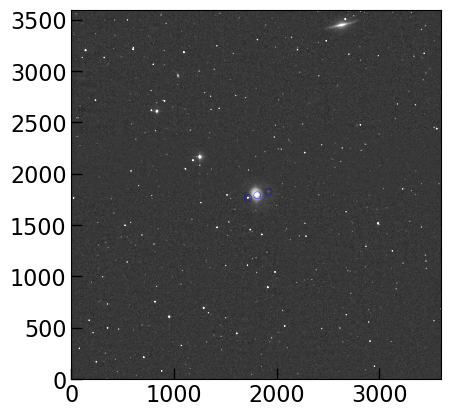

In [20]:
# detect the point foreground stars.
img.get_sources_foreground(plot=True, percent=99.9)

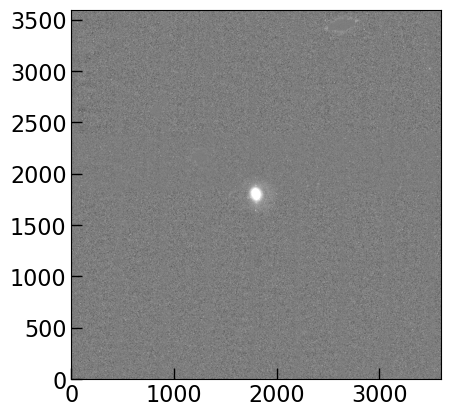

In [23]:
# clean all the foreground stars.
img.remove_sources_simple(plot=True,percent=99.9)

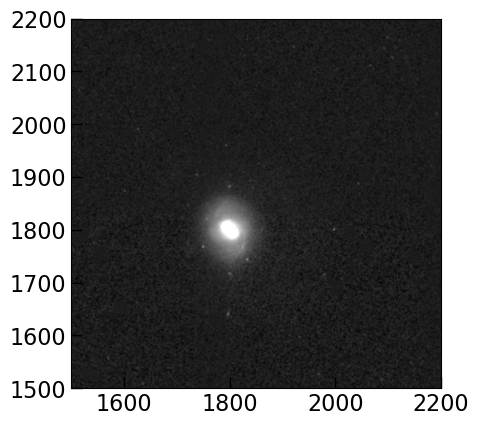

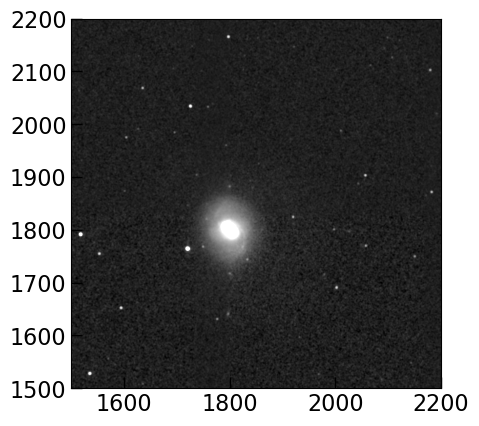

In [24]:
# comparsion.(local)
from matplotlib import pyplot as plt
from astropy.visualization import simple_norm
norm = simple_norm(img._image_cleaned, stretch='asinh', percent=99.99)
plt.imshow(img._image_cleaned, origin='lower', cmap='gray', norm=norm)
plt.xlim(1500,2200)
plt.ylim(1500,2200)
plt.show()
norm = simple_norm(img._data_subbkg, stretch='asinh', percent=99.95)
plt.imshow(img._data_subbkg, origin='lower', cmap='gray', norm=norm)
plt.xlim(1500,2200)
plt.ylim(1500,2200)
plt.show()

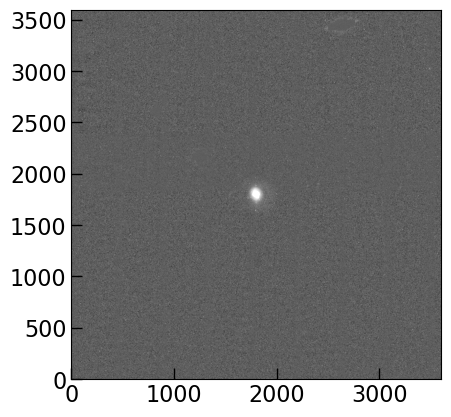

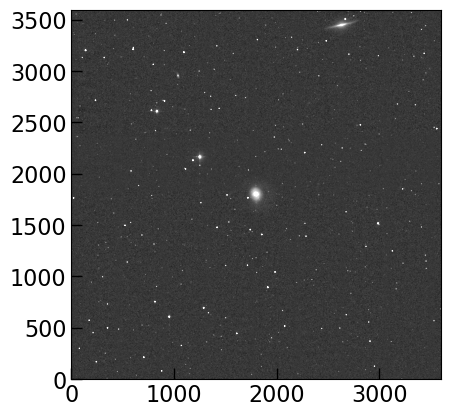

In [25]:
# comparsion.(whole image)
norm = simple_norm(img._image_cleaned, stretch='asinh', percent=99.95)
plt.imshow(img._image_cleaned, origin='lower', cmap='gray', norm=norm)
plt.show()
norm = simple_norm(img._data_subbkg, stretch='asinh', percent=99.9)
plt.imshow(img._data_subbkg, origin='lower', cmap='gray', norm=norm)
plt.show()